In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
f = open('DC.txt')
dc = np.array([ np.array(line.split()).astype(np.float) for line in f] )

In [3]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * (np.cos((2*np.pi/360)*x + b)**2) +c

Text(0.5, 1.0, 'DC vs Curve fit')

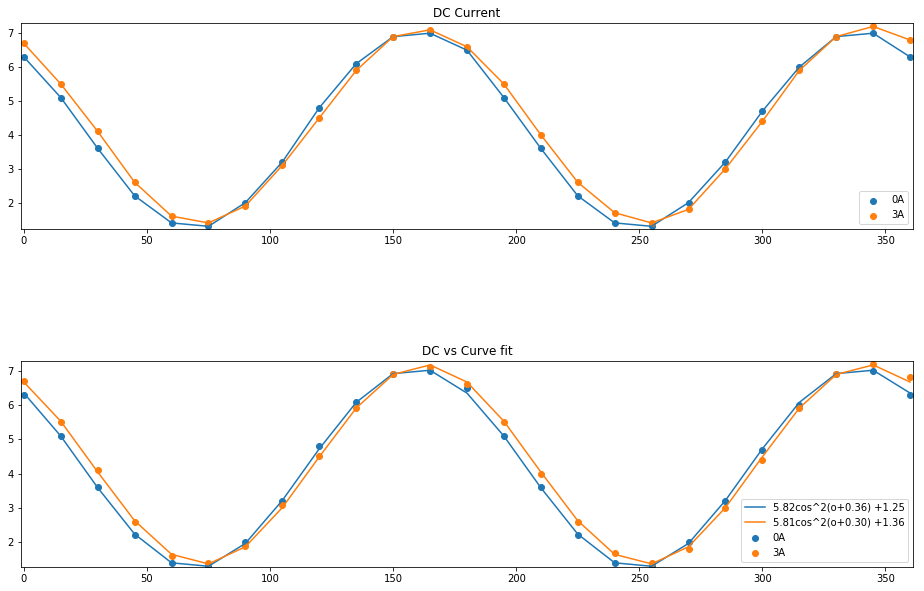

In [4]:
%matplotlib inline
from matplotlib import gridspec
start, end = 0, -1
fig = plt.figure(0, figsize=(16, 10))
x = dc[:, 0]
y = dc[:, 1]
z = dc[:, 2]
gs = gridspec.GridSpec(5, 4)
ax1 = plt.subplot(gs[0:2, 0:])
ax1.plot(x, y)
ax1.scatter(x, y, label='0A')
ax1.plot(x,z)
ax1.scatter(x, z, label='3A')
ax1.margins(0)
plt.legend(loc='lower right')
plt.title("DC Current")

ax2 = plt.subplot(gs[3:, 0:])
params1, params_covariance = optimize.curve_fit(test_func, x, y, bounds=([0, 0, 0], [6, np.pi, 2]) )
p1 = test_func(x, *params1)
params2, params_covariance = optimize.curve_fit(test_func, x, z, bounds=([0, 0, 0], [6, np.pi, 2]) )
p2 = test_func(x, *params2)

ax2.scatter(x, y, label='0A')
ax2.plot(x, p1, label =  "{:.2f}".format(params1[0])+'cos^2(o+' + "{:.2f}".format(params1[1])+') +' + "{:.2f}".format(params1[2]))
ax2.scatter(x,z, label= '3A')
ax2.plot(x, p2, label = "{:.2f}".format(params2[0])+'cos^2(o+' + "{:.2f}".format(params2[1])+') +' + "{:.2f}".format(params2[2]))
ax2.legend(loc='lower right')
ax2.margins(0)
plt.title("DC vs Curve fit")



In [5]:
o = params1[1]-params2[1] #rads
L_s = 15 #cm
u = 4*np.pi * 1e-7
I = 3 #A
N = 1400
L_r = 10 #cm

In [6]:
B = u*N*I/L_s
B


0.0003518583772020569

In [9]:
o/(B*L_r) #Verdet constant

17.013694754562465

3